<a href="https://colab.research.google.com/github/RatchanonPa/python_dataviz2024/blob/main/HR_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Loading data

In [3]:
import pandas as pd
import os

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
path_to_hr = '/content/drive/MyDrive/data_viz_2024_DATA/HR.csv'

In [6]:
hr = pd.read_csv(path_to_hr)
hr

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,city_173,0.878,Male,No relevent experience,no_enrollment,Graduate,Humanities,14,NaN,NaN,1,42,1.0
19154,31398,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,NaN,NaN,4,52,1.0
19155,24576,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,4,44,0.0
19156,5756,city_65,0.802,Male,Has relevent experience,no_enrollment,High School,NaN,<1,500-999,Pvt Ltd,2,97,0.0


## Data Preprocessing

In [7]:
hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

In [8]:
def count_percent(data):
  df_cols = pd.DataFrame({'Count Missing': data.isnull().sum(),
                        'Percent Missing': data.isnull().sum()*100/data.shape[0]})
  return df_cols

In [9]:
count_percent(hr)

,Count Missing,Percent Missing
enrollee_id,0,0.000000
city,0,0.000000
city_development_index,0,0.000000
gender,4508,23.530640
relevent_experience,0,0.000000
enrolled_university,386,2.014824
education_level,460,2.401086
major_discipline,2813,14.683161
experience,65,0.339284
company_size,5938,30.994885


> เติมข้อมูลกับข้อมูลที่มีค่าว่างต่ำกว่า 3%

In [10]:
# prompt: เติมข้อมูล enrolled_university, education_level, experience, last_new_job ด้วย mode

for column in ['enrolled_university', 'education_level', 'experience', 'last_new_job']:
  hr[column].fillna(hr[column].mode()[0], inplace=True)

hr.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     19158 non-null  object 
 6   education_level         19158 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19158 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            19158 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

<ipython-input-10-46f3d7666416>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  hr[column].fillna(hr[column].mode()[0], inplace=True)


In [11]:
count_percent(hr)

,Count Missing,Percent Missing
enrollee_id,0,0.000000
city,0,0.000000
city_development_index,0,0.000000
gender,4508,23.530640
relevent_experience,0,0.000000
enrolled_university,0,0.000000
education_level,0,0.000000
major_discipline,2813,14.683161
experience,0,0.000000
company_size,5938,30.994885


> สำหรับค่าที่ว่างเกิน 10% จะให้เป็น unknown

In [12]:
# prompt: สำหรับค่าที่ว่างเกิน 10% จะให้เป็น unknown

for column in hr.columns:
  if hr[column].isnull().sum() * 100 / hr.shape[0] > 10:
    hr[column].fillna('unknown', inplace=True)

hr.info()
count_percent(hr)


<ipython-input-12-07d0d4050fcc>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  hr[column].fillna('unknown', inplace=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  19158 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     19158 non-null  object 
 6   education_level         19158 non-null  object 
 7   major_discipline        19158 non-null  object 
 8   experience              19158 non-null  object 
 9   company_size            19158 non-null  object 
 10  company_type            19158 non-null  object 
 11  last_new_job            19158 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

,Count Missing,Percent Missing
enrollee_id,0,0.0
city,0,0.0
city_development_index,0,0.0
gender,0,0.0
relevent_experience,0,0.0
enrolled_university,0,0.0
education_level,0,0.0
major_discipline,0,0.0
experience,0,0.0
company_size,0,0.0


>

> ปรับแต่งข้อมูล

In [13]:
hr['city'] = hr['city'].str.replace('city_', '')

In [14]:
hr['company_size'] = hr['company_size'].replace('10/49', '10-49')

In [15]:
hr['relevent_experience'] = hr['relevent_experience'].replace({'Has relevent experience': 'Yes', 'No relevent experience': 'No'})

> explore data

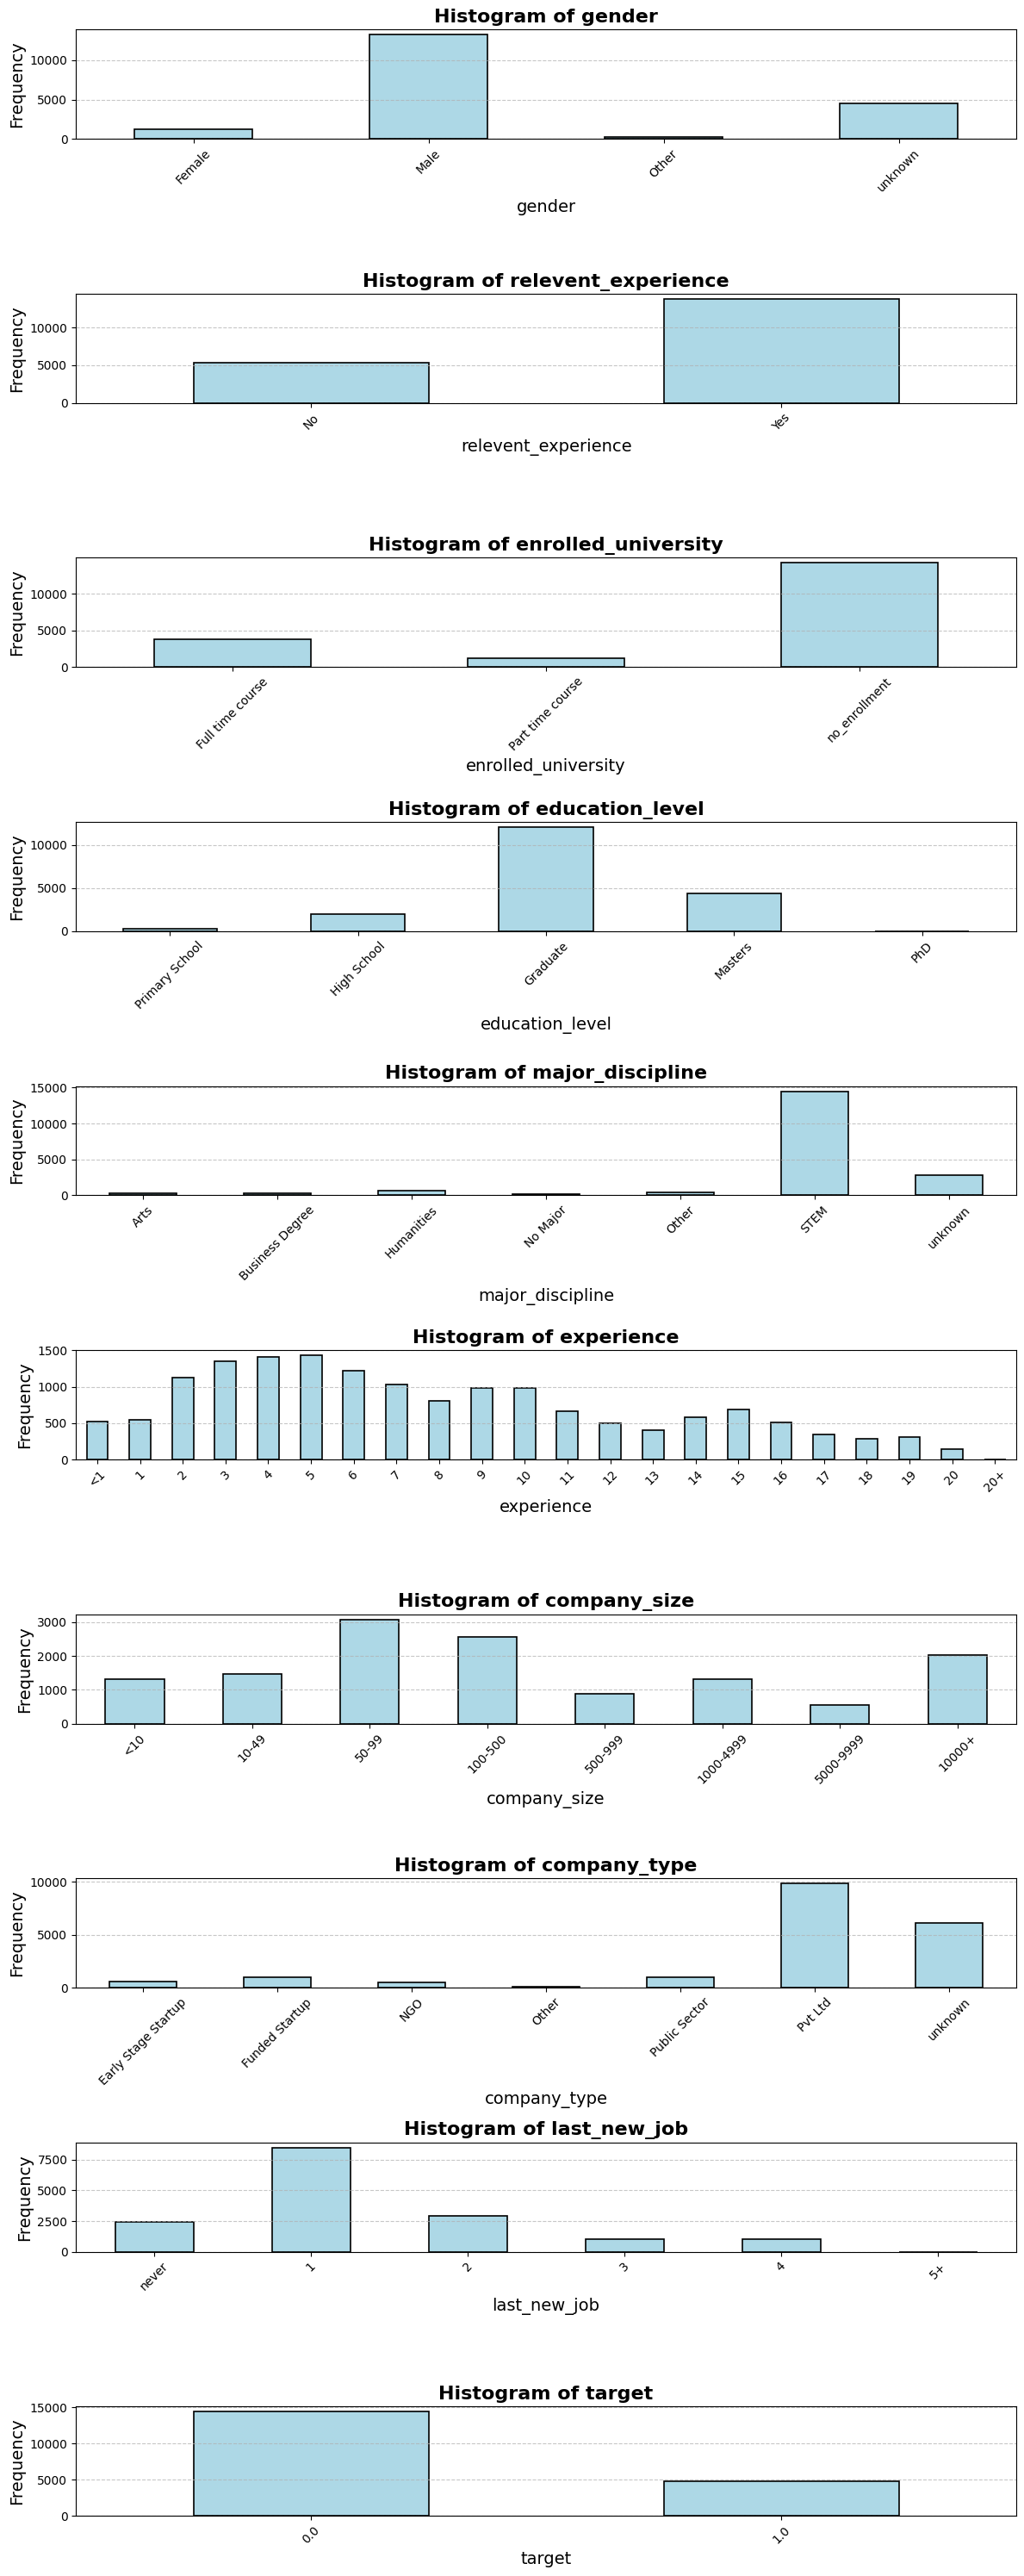

In [16]:
import matplotlib.pyplot as plt
import pandas as pd

# List of columns to plot histograms for, excluding specific columns
excluded_columns = ['enrollee_id', 'city_development_index', 'city', 'training_hours']
cols_to_plot = [col for col in hr.columns if col not in excluded_columns]

# Define ordered categories for specific columns
experience_order = ['<1', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
                    '13', '14', '15', '16', '17', '18', '19', '20', '20+']
company_size_order = ['<10', '10-49', '50-99', '100-500', '500-999', '1000-4999',
                      '5000-9999', '10000+']
last_new_job_order = ['never', '1', '2', '3', '4', '5+']
education_level_order = ['Primary School', 'High School', 'Graduate', 'Masters', 'PhD']

# Create subplots for each column
fig, axes = plt.subplots(nrows=len(cols_to_plot), ncols=1, figsize=(12, 30))  # Adjust size as needed

# Iterate through columns and create histograms
for i, col in enumerate(cols_to_plot):
    if col == 'experience':
        hr[col] = pd.Categorical(hr[col], categories=experience_order, ordered=True)
        hr[col].value_counts().sort_index().plot(kind='bar', ax=axes[i], color='lightblue', edgecolor='black', linewidth=1.2)
    elif col == 'company_size':
        hr[col] = pd.Categorical(hr[col], categories=company_size_order, ordered=True)
        hr[col].value_counts().sort_index().plot(kind='bar', ax=axes[i], color='lightblue', edgecolor='black', linewidth=1.2)
    elif col == 'last_new_job':
        hr[col] = pd.Categorical(hr[col], categories=last_new_job_order, ordered=True)
        hr[col].value_counts().sort_index().plot(kind='bar', ax=axes[i], color='lightblue', edgecolor='black', linewidth=1.2)
    elif col == 'education_level':
        hr[col] = pd.Categorical(hr[col], categories=education_level_order, ordered=True)
        hr[col].value_counts().sort_index().plot(kind='bar', ax=axes[i], color='lightblue', edgecolor='black', linewidth=1.2)
    else:
        hr[col].value_counts().sort_index().plot(kind='bar', ax=axes[i], color='lightblue', edgecolor='black', linewidth=1.2)

    # Set titles and labels
    axes[i].set_title(f'Histogram of {col}', fontsize=16, fontweight='bold', color='black')
    axes[i].set_xlabel(col, fontsize=14)
    axes[i].set_ylabel('Frequency', fontsize=14)

    # Add grid for better readability
    axes[i].grid(axis='y', linestyle='--', alpha=0.7)

    # Set x-tick labels rotation for better visibility
    axes[i].tick_params(axis='x', rotation=45)

# Adjust layout for better spacing
plt.tight_layout()
plt.show()




In [17]:
hr.head(20)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,103,0.920,Male,Yes,no_enrollment,Graduate,STEM,NaN,NaN,unknown,1,36,1.0
1,29725,40,0.776,Male,No,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,NaN,47,0.0
2,11561,21,0.624,unknown,No,Full time course,Graduate,STEM,5,NaN,unknown,never,83,0.0
3,33241,115,0.789,unknown,No,no_enrollment,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,162,0.767,Male,Yes,no_enrollment,Masters,STEM,NaN,50-99,Funded Startup,4,8,0.0
5,21651,176,0.764,unknown,Yes,Part time course,Graduate,STEM,11,NaN,unknown,1,24,1.0
6,28806,160,0.920,Male,Yes,no_enrollment,High School,unknown,5,50-99,Funded Startup,1,24,0.0
7,402,46,0.762,Male,Yes,no_enrollment,Graduate,STEM,13,<10,Pvt Ltd,NaN,18,1.0
8,27107,103,0.920,Male,Yes,no_enrollment,Graduate,STEM,7,50-99,Pvt Ltd,1,46,1.0
9,699,103,0.920,unknown,Yes,no_enrollment,Graduate,STEM,17,10000+,Pvt Ltd,NaN,123,0.0


> Save data

In [18]:
hr.to_csv('/content/drive/MyDrive/data_viz_2024_DATA/hr_overview.csv', index=False)

# Applicant Profile

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [24]:
hr_path = '/content/drive/MyDrive/data_viz_2024_DATA/hr_overview.csv'
hr = pd.read_csv(hr_path)

In [19]:
# prompt: ดูว่ามีค่าอะไรบ้างในแต่ละตัวแปร

for column in hr.columns:
  print(f"Unique values for {column}:")
  print(hr[column].unique())
  print("-" * 20)


Unique values for enrollee_id:
[ 8949 29725 11561 ... 24576  5756 23834]
--------------------
Unique values for city:
['103' '40' '21' '115' '162' '176' '160' '46' '61' '114' '13' '159' '102'
 '67' '100' '16' '71' '104' '64' '101' '83' '105' '73' '75' '41' '11' '93'
 '90' '36' '20' '57' '152' '19' '65' '74' '173' '136' '98' '97' '50' '138'
 '82' '157' '89' '150' '70' '175' '94' '28' '59' '165' '145' '142' '26'
 '12' '37' '43' '116' '23' '99' '149' '10' '45' '80' '128' '158' '123' '7'
 '72' '106' '143' '78' '109' '24' '134' '48' '144' '91' '146' '133' '126'
 '118' '9' '167' '27' '84' '54' '39' '79' '76' '77' '81' '131' '44' '117'
 '155' '33' '141' '127' '62' '53' '25' '2' '69' '120' '111' '30' '1' '140'
 '179' '55' '14' '42' '107' '18' '139' '180' '166' '121' '129' '8' '31'
 '171']
--------------------
Unique values for city_development_index:
[0.92  0.776 0.624 0.789 0.767 0.764 0.762 0.913 0.926 0.827 0.843 0.804
 0.855 0.887 0.91  0.884 0.924 0.666 0.558 0.923 0.794 0.754 0.939 0.55


In [23]:
def normalize_experience(exp):
    """Normalize experience value to 0-1 scale"""
    if pd.isna(exp):
        return 0
    if exp == '<1':
        return 0.1
    if exp == '20+':
        return 1.0
    try:
        return float(exp) / 20
    except:
        return 0

def normalize_education(level):
    """Normalize education level to 0-1 scale"""
    edu_levels = {
        'Primary School': 0.2,
        'High School': 0.4,
        'Graduate': 0.6,
        'Masters': 0.8,
        'PhD': 1.0
    }
    return edu_levels.get(level, 0)

def normalize_company_size(size):
    """Normalize company size to 0-1 scale"""
    size_levels = {
        '<10': 0.1,
        '10-49': 0.2,
        '50-99': 0.3,
        '100-500': 0.5,
        '500-999': 0.6,
        '1000-4999': 0.7,
        '5000-9999': 0.8,
        '10000+': 1.0
    }
    return size_levels.get(size, 0)

def normalize_training_hours(hours):
    """Normalize training hours to 0-1 scale"""
    if pd.isna(hours):
        return 0
    return min(float(hours) / 336, 1)  # 336 is max training hours in dataset

def normalize_cdi(cdi):
    """Normalize city development index to 0-1 scale"""
    if pd.isna(cdi):
        return 0
    return (cdi - 0.448) / (0.949 - 0.448)

def create_radar_chart(df, candidate_ids, save_path=None):
    """
    Create radar chart for one or more candidates

    Parameters:
    df (DataFrame): The dataset
    candidate_ids (list): List of candidate IDs to plot
    save_path (str): Optional path to save the plot
    """

    # Metrics to be plotted
    metrics = ['Experience', 'Education', 'Company Scale',
              'Training', 'City Development', 'Relevant Experience']

    # Number of variables
    num_vars = len(metrics)

    # Compute angle for each axis
    angles = [n / float(num_vars) * 2 * np.pi for n in range(num_vars)]
    angles += angles[:1]

    # Initialize the spider plot
    fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(projection='polar'))

    # Plot for each candidate
    colors = ['blue', 'red', 'green', 'purple', 'orange']
    for idx, candidate_id in enumerate(candidate_ids):
        candidate = df[df['enrollee_id'] == candidate_id].iloc[0]

        # Calculate values for each metric
        values = [
            normalize_experience(candidate['experience']),
            normalize_education(candidate['education_level']),
            normalize_company_size(candidate['company_size']),
            normalize_training_hours(candidate['training_hours']),
            normalize_cdi(candidate['city_development_index']),
            1.0 if candidate['relevent_experience'] == 'Yes' else 0.3
        ]
        values += values[:1]

        # Plot the values
        ax.plot(angles, values, color=colors[idx % len(colors)],
                linewidth=1, linestyle='solid', label=f'Candidate {candidate_id}')
        ax.fill(angles, values, color=colors[idx % len(colors)], alpha=0.25)

    # Fix axis to go in the right order and start at 12 o'clock
    ax.set_theta_offset(np.pi / 2)
    ax.set_theta_direction(-1)

    # Draw axis lines for each angle and label
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(metrics)

    # Draw ylabels
    ax.set_rlabel_position(0)
    plt.yticks([0.2, 0.4, 0.6, 0.8, 1.0],
               ['20%', '40%', '60%', '80%', '100%'],
               color='grey', size=7)
    plt.ylim(0, 1)

    # Add legend
    plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

    plt.title("Applicant Profile Comparison", size=20, y=1.05)

    if save_path:
        plt.savefig(save_path)

    plt.show()

In [ ]:
# Example usage:
def analyze_applicants(data_path):
    """
    Analyze applicants from the dataset

    Parameters:
    data_path (str): Path to the CSV file containing the dataset
    """
    # Read the dataset
    df = pd.read_csv(data_path)

    # Example: Compare three random candidates
    candidate_ids = df['enrollee_id'].sample(n=3).tolist()
    create_radar_chart(df, candidate_ids)

    # Create summary statistics
    print("\nProfile Analysis Summary:")
    print("-" * 50)
    for candidate_id in candidate_ids:
        candidate = df[df['enrollee_id'] == candidate_id].iloc[0]
        print(f"\nCandidate {candidate_id}:")
        print(f"Experience: {candidate['experience']}")
        print(f"Education: {candidate['education_level']}")
        print(f"Company Size: {candidate['company_size']}")
        print(f"Training Hours: {candidate['training_hours']}")
        print(f"City Development Index: {candidate['city_development_index']:.3f}")
        print(f"Relevant Experience: {candidate['relevent_experience']}")

# To use the code:
# analyze_applicants('your_dataset.csv')

In [26]:
# Example usage:
def analyze_applicants(data_path):
    """
    Analyze applicants from the dataset

    Parameters:
    data_path (str): Path to the CSV file containing the dataset
    """
    # Read the dataset
    df = pd.read_csv(data_path)

    # Example: Compare three random candidates
    candidate_ids = df['enrollee_id'].sample(n=3).tolist()
    create_radar_chart(df, candidate_ids)

    # Create summary statistics
    print("\nProfile Analysis Summary:")
    print("-" * 50)
    for candidate_id in candidate_ids:
        candidate = df[df['enrollee_id'] == candidate_id].iloc[0]
        print(f"\nCandidate {candidate_id}:")
        print(f"Experience: {candidate['experience']}")
        print(f"Education: {candidate['education_level']}")
        print(f"Company Size: {candidate['company_size']}")
        print(f"Training Hours: {candidate['training_hours']}")
        print(f"City Development Index: {candidate['city_development_index']:.3f}")
        print(f"Relevant Experience: {candidate['relevent_experience']}")

# To use the code:
# analyze_applicants('your_dataset.csv')

In [ ]:
'/content/drive/MyDrive/data_viz_2024_DATA/hr_overview.csv'

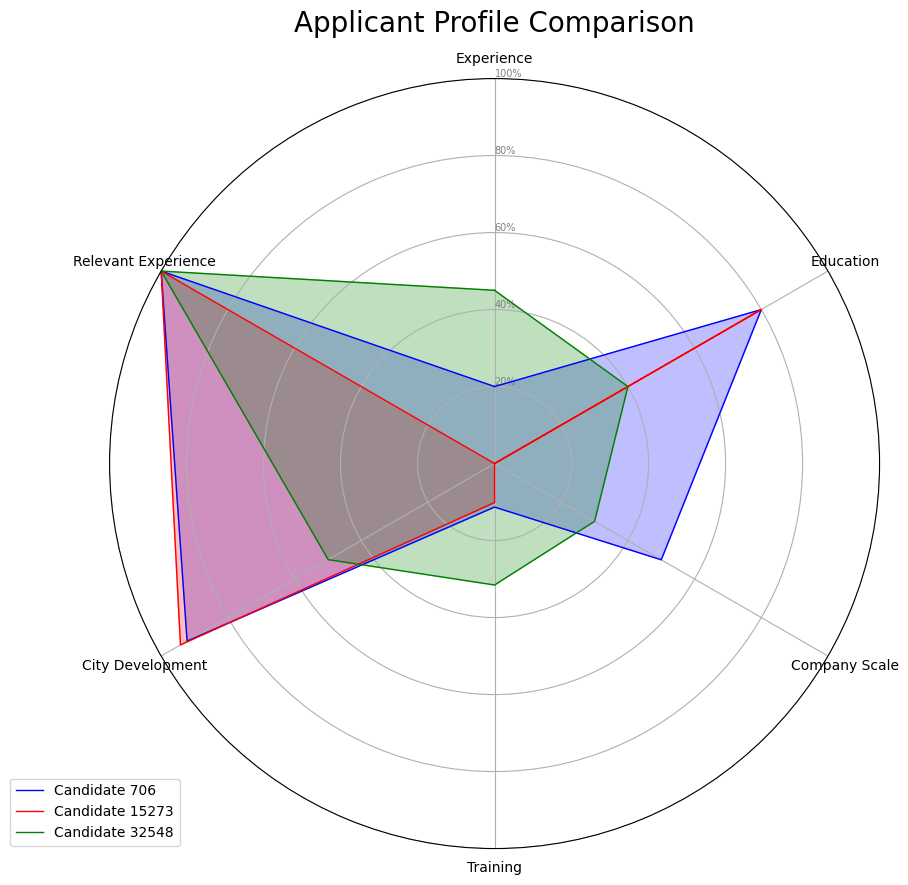


Profile Analysis Summary:
--------------------------------------------------

Candidate 706:
Experience: 4
Education: Masters
Company Size: 100-500
Training Hours: 38
City Development Index: 0.910
Relevant Experience: Yes

Candidate 15273:
Experience: nan
Education: Masters
Company Size: nan
Training Hours: 34
City Development Index: 0.920
Relevant Experience: Yes

Candidate 32548:
Experience: 9
Education: High School
Company Size: 50-99
Training Hours: 106
City Development Index: 0.698
Relevant Experience: Yes


In [28]:
ap_pro = analyze_applicants(hr_path)

In [ ]:
# Applicant Profile Calculator System

## Profile Calculation Functions
class ApplicantProfiler:
    def __init__(self, data_row):
        self.data = data_row
        self.profile = {}

    def calculate_all_metrics(self):
        """Calculate all metrics for the applicant profile"""
        self.profile = {
            'Education Score': self._calculate_education_score(),
            'Experience Index': self._calculate_experience_index(),
            'Technical Readiness': self._calculate_technical_readiness(),
            'City Development': self._calculate_city_development(),
            'Learning Investment': self._calculate_learning_investment(),
            'Career Stability': self._calculate_career_stability()
        }
        return self.profile

    def _calculate_education_score(self):
        """Calculate education score (0-1)"""
        education_weights = {
            'Primary School': 0.2,
            'High School': 0.4,
            'Graduate': 0.6,
            'Masters': 0.8,
            'PHD': 1.0
        }

        major_weights = {
            'STEM': 1.0,
            'Business Degree': 0.8,
            'Arts': 0.6,
            'Humanities': 0.6,
            'Other': 0.5
        }

        edu_score = education_weights.get(self.data['education_level'], 0.4)
        major_score = major_weights.get(self.data['major_discipline'], 0.5)

        return (edu_score * 0.6 + major_score * 0.4)

    def _calculate_experience_index(self):
        """Calculate experience index (0-1)"""
        # Convert experience to numeric value
        exp_years = self._parse_experience(self.data['experience'])

        # Base experience score (normalized to 20 years)
        base_score = min(exp_years / 20, 1.0)

        # Relevant experience multiplier
        relevance_mult = 1.2 if self.data['relevant_experience'] == 'Yes' else 1.0

        return min(base_score * relevance_mult, 1.0)

    def _calculate_technical_readiness(self):
        """Calculate technical readiness score (0-1)"""
        # Training hours score
        training_score = min(self.data['training_hours'] / 100, 1.0)

        # Technical background score
        tech_score = 1.0 if self.data['major_discipline'] == 'STEM' else 0.7

        return (training_score * 0.5 + tech_score * 0.5)

    def _calculate_city_development(self):
        """Calculate city development score (0-1)"""
        return self.data['city_development_index']

    def _calculate_learning_investment(self):
        """Calculate learning investment score (0-1)"""
        # Training commitment
        training_score = min(self.data['training_hours'] / 100, 1.0)

        # Current education status
        education_scores = {
            'Full time course': 1.0,
            'Part time course': 0.8,
            'no_enrollment': 0.4,
            'unknown': 0.4
        }
        education_score = education_scores.get(self.data['enrolled_university'], 0.4)

        return (training_score * 0.6 + education_score * 0.4)

    def _calculate_career_stability(self):
        """Calculate career stability score (0-1)"""
        # Job tenure score
        last_job = self._parse_last_job(self.data['last_new_job'])
        tenure_score = min((last_job + 1) / 5, 1.0)

        # Company size score
        size_scores = {
            '<10': 0.4,
            '10-49': 0.5,
            '50-99': 0.6,
            '100-500': 0.7,
            '500-999': 0.8,
            '1000-4999': 0.9,
            '5000-9999': 1.0,
            '10000+': 1.0
        }
        size_score = size_scores.get(self.data['company_size'], 0.6)

        return (tenure_score * 0.6 + size_score * 0.4)

    @staticmethod
    def _parse_experience(exp):
        """Convert experience string to numeric value"""
        if exp == '<1': return 0.5
        if exp == '>20': return 25
        return float(exp)

    @staticmethod
    def _parse_last_job(last_job):
        """Convert last job string to numeric value"""
        if last_job == 'never': return 0
        if last_job == '>4': return 5
        return float(last_job)
```

## Usage Example

```python
# Create profiles for candidates
def create_candidate_profiles(data_df):
    profiles = {}

    for idx, row in data_df.iterrows():
        profiler = ApplicantProfiler(row)
        profiles[f'Candidate_{idx}'] = profiler.calculate_all_metrics()

    return profiles

# Calculate industry averages
def calculate_industry_averages(profiles):
    metrics = list(next(iter(profiles.values())).keys())
    avg_profile = {}

    for metric in metrics:
        avg_profile[metric] = sum(p[metric] for p in profiles.values()) / len(profiles)

    return avg_profile


## Profile Interpretation Guidelines

### 1. Education Score
- **High (0.8-1.0)**: Advanced degree in relevant field
- **Medium (0.5-0.7)**: Bachelor's degree or relevant certification
- **Low (0.0-0.4)**: Limited formal education

### 2. Experience Index
- **High (0.8-1.0)**: Extensive relevant experience
- **Medium (0.5-0.7)**: Moderate experience or transferable skills
- **Low (0.0-0.4)**: Limited experience

### 3. Technical Readiness
- **High (0.8-1.0)**: Strong technical background and training
- **Medium (0.5-0.7)**: Moderate technical skills
- **Low (0.0-0.4)**: Limited technical preparation

### 4. City Development
- **High (0.8-1.0)**: Major tech hub
- **Medium (0.5-0.7)**: Developing tech scene
- **Low (0.0-0.4)**: Limited tech presence

### 5. Learning Investment
- **High (0.8-1.0)**: Strong commitment to learning
- **Medium (0.5-0.7)**: Moderate learning engagement
- **Low (0.0-0.4)**: Limited learning activity

### 6. Career Stability
- **High (0.8-1.0)**: Stable career progression
- **Medium (0.5-0.7)**: Moderate stability
- **Low (0.0-0.4)**: Frequent changes or unclear progression

In [ ]:
from applicant_analysis import analyze_applicants

# Analyze random candidates
analyze_applicants('your_dataset.csv')

# Or analyze specific candidates
from applicant_analysis import create_radar_chart
import pandas as pd

df = pd.read_csv('your_dataset.csv')
specific_candidates = [8949, 29725, 11561]  # example IDs
create_radar_chart(df, specific_candidates)

# Career Transition Spider Chart Metrics

>  Education Score

In [ ]:
def calculate_education_score(row):
    # Base education level score
    edu_scores = {
        'Primary School': 0.2,
        'High School': 0.4,
        'Graduate': 0.6,
        'Masters': 0.8,
        'PHD': 1.0
    }

    base_score = edu_scores.get(row['education_level'], 0)

    # Adjust for relevance of major
    relevance_bonus = 0.2 if row['major_discipline'] == 'STEM' else 0.1

    # Adjust for current enrollment
    enrollment_bonus = {
        'Full time course': 0.2,
        'Part time course': 0.1,
        'no_enrollment': 0,
        'unknown': 0
    }

    final_score = min(1.0, base_score + relevance_bonus +
                     enrollment_bonus.get(row['enrolled_university'], 0))
    return final_score

> Experience Index

In [ ]:
def calculate_experience_index(row):
    # Convert experience to numeric
    exp_years = parse_experience(row['experience'])

    # Calculate base experience score (normalized to 20 years max)
    base_score = min(exp_years / 20, 1.0)

    # Adjust for relevant experience
    relevance_multiplier = 1.2 if row['relevant_experience'] == 'Yes' else 1.0

    # Adjust for recency of job change
    recency_factor = 1 - (parse_last_job(row['last_new_job']) / 10)

    final_score = min(1.0, base_score * relevance_multiplier * recency_factor)
    return final_score

> Technical Readiness

In [ ]:
def calculate_technical_readiness(row):
    # Normalize training hours (assume max 100 hours)
    training_score = min(row['training_hours'] / 100, 1.0)

    # Technical background score
    tech_background = 1.0 if row['major_discipline'] == 'STEM' else 0.6

    # Relevant experience weight
    exp_weight = 1.2 if row['relevant_experience'] == 'Yes' else 0.8

    final_score = min(1.0, (training_score * 0.4 +
                           tech_background * 0.3 +
                           exp_weight * 0.3))
    return final_score

> City Development Score

In [ ]:
def calculate_city_development_score(row):
    # City development index is already normalized (0-1)
    base_score = row['city_development_index']

    # Adjust for company type presence
    company_type_factor = 1.2 if row['company_type'] in ['Pvt Ltd', 'Funded Startup'] else 1.0

    final_score = min(1.0, base_score * company_type_factor)
    return final_score

> Learning Investment

In [ ]:
def calculate_learning_investment(row):
    # Normalize training hours
    training_score = min(row['training_hours'] / 100, 1.0)

    # Education enrollment score
    enrollment_score = {
        'Full time course': 1.0,
        'Part time course': 0.7,
        'no_enrollment': 0.3,
        'unknown': 0.3
    }

    # Calculate learning dedication
    learning_score = (training_score * 0.6 +
                     enrollment_score.get(row['enrolled_university'], 0.3) * 0.4)
    return learning_score

> Career Stability

In [ ]:
def calculate_career_stability(row):
    # Parse last job change
    last_job_years = parse_last_job(row['last_new_job'])

    # Normalize job tenure (assume 5 years is optimal)
    tenure_score = min(last_job_years / 5, 1.0)

    # Company size stability factor
    company_size_factor = {
        '<10': 0.6,
        '10-49': 0.7,
        '50-99': 0.8,
        '100-500': 0.9,
        '500-999': 1.0,
        '1000-4999': 1.0,
        '5000-9999': 1.0,
        '10000+': 1.0,
        'unknown': 0.7
    }

    final_score = (tenure_score * 0.7 +
                  company_size_factor.get(row['company_size'], 0.7) * 0.3)
    return final_score

# 1

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

class ApplicantProfiler:
    def __init__(self):
        # Education level weights
        self.edu_weights = {
            'Primary School': 0.2,
            'High School': 0.4,
            'Graduate': 0.7,
            'Masters': 1.0,
            'PhD': 1.0
        }

        # Major discipline weights
        self.major_weights = {
            'STEM': 1.0,
            'Business Degree': 0.8,
            'Arts': 0.6,
            'Humanities': 0.6,
            'No Major': 0.3,
            'Other': 0.5
        }

        # Company type weights for experience relevance
        self.company_weights = {
            'Pvt Ltd': 0.9,
            'Funded Startup': 1.0,
            'Early Stage Startup': 0.9,
            'Public Sector': 0.8,
            'NGO': 0.7,
            'Other': 0.6
        }

    def calculate_experience_score(self, row):
        """Calculate experience score based on years of experience and relevance"""
        # Base experience normalization
        if pd.isna(row['experience']):
            base_exp = 0
        elif row['experience'] == '<1':
            base_exp = 0.1
        elif row['experience'] == '20+':
            base_exp = 1.0
        else:
            base_exp = min(float(row['experience']) / 20, 1.0)

        # Relevant experience multiplier
        relevance_mult = 1.3 if row['relevent_experience'] == 'Yes' else 1.0

        # Company type weight
        company_mult = self.company_weights.get(row['company_type'], 0.6)

        return min(base_exp * relevance_mult * company_mult, 1.0)

    def calculate_education_score(self, row):
        """Calculate education score based on level, major, and enrollment status"""
        # Base education score
        edu_score = self.edu_weights.get(row['education_level'], 0.2)

        # Major discipline score
        major_score = self.major_weights.get(row['major_discipline'], 0.5)

        # Enrollment bonus (showing continuous learning)
        enrollment_bonus = 0.2 if row['enrolled_university'] != 'no_enrollment' else 0

        return min((edu_score * 0.5 + major_score * 0.3 + enrollment_bonus), 1.0)

    def calculate_training_score(self, row):
        """Calculate training score based on training hours"""
        if pd.isna(row['training_hours']):
            return 0
        return min(row['training_hours'] / 336, 1.0)  # 336 is max in dataset

    def calculate_potential_score(self, row):
        """Calculate potential score based on education, training, and city development"""
        # Education potential
        edu_potential = 1.0 if row['enrolled_university'] != 'no_enrollment' else 0.6

        # City development contribution
        city_dev = (float(row['city_development_index']) - 0.448) / (0.949 - 0.448)

        # Last job change recency
        job_change_score = 0.8
        if row['last_new_job'] != 'never':
            try:
                job_change_score = 1 - (float(row['last_new_job']) / 5)  # Normalize by 5 years
            except:
                job_change_score = 0.8

        return (edu_potential * 0.4 + city_dev * 0.3 + job_change_score * 0.3)

    def calculate_company_exposure_score(self, row):
        """Calculate score based on company size and type exposure"""
        # Company size score
        size_weights = {
            '<10': 0.3,
            '10-49': 0.4,
            '50-99': 0.5,
            '100-500': 0.6,
            '500-999': 0.7,
            '1000-4999': 0.8,
            '5000-9999': 0.9,
            '10000+': 1.0
        }
        size_score = size_weights.get(row['company_size'], 0.3)

        # Company type score
        type_score = self.company_weights.get(row['company_type'], 0.6)

        return (size_score * 0.6 + type_score * 0.4)

    def get_applicant_scores(self, row):
        """Calculate all scores for an applicant"""
        return {
            'Experience': self.calculate_experience_score(row),
            'Education': self.calculate_education_score(row),
            'Training': self.calculate_training_score(row),
            'Potential': self.calculate_potential_score(row),
            'Company Exposure': self.calculate_company_exposure_score(row),
            'Market Readiness': float(row['city_development_index'])
        }

def create_radar_chart(df, candidate_ids):
    """Create radar chart for selected candidates"""
    profiler = ApplicantProfiler()

    # Metrics to be plotted
    metrics = ['Experience', 'Education', 'Training',
              'Potential', 'Company Exposure', 'Market Readiness']

    # Number of variables
    num_vars = len(metrics)

    # Compute angle for each axis
    angles = [n / float(num_vars) * 2 * np.pi for n in range(num_vars)]
    angles += angles[:1]

    # Initialize the spider plot
    fig, ax = plt.subplots(figsize=(12, 8), subplot_kw=dict(projection='polar'))

    # Plot for each candidate
    colors = ['#FF9671', '#00C9A7', '#845EC2', '#4B4453', '#C34A36']

    for idx, candidate_id in enumerate(candidate_ids):
        candidate = df[df['enrollee_id'] == candidate_id].iloc[0]
        scores = profiler.get_applicant_scores(candidate)

        values = [scores[metric] for metric in metrics]
        values += values[:1]

        ax.plot(angles, values, color=colors[idx % len(colors)],
                linewidth=2, linestyle='solid', label=f'Candidate {candidate_id}')
        ax.fill(angles, values, color=colors[idx % len(colors)], alpha=0.25)

    # Fix axis to go in the right order and start at 12 o'clock
    ax.set_theta_offset(np.pi / 2)
    ax.set_theta_direction(-1)

    # Draw axis lines for each angle and label
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(metrics)

    # Draw ylabels
    ax.set_rlabel_position(0)
    plt.yticks([0.2, 0.4, 0.6, 0.8, 1.0],
               ['20%', '40%', '60%', '80%', '100%'],
               color='grey', size=8)
    plt.ylim(0, 1)

    # Add legend
    plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

    plt.title("Applicant Profile Comparison", size=20, y=1.05)

    return plt

def analyze_candidates(df, candidate_ids):
    """Analyze and print detailed scores for candidates"""
    profiler = ApplicantProfiler()

    print("\nDetailed Candidate Analysis")
    print("-" * 50)

    for candidate_id in candidate_ids:
        candidate = df[df['enrollee_id'] == candidate_id].iloc[0]
        scores = profiler.get_applicant_scores(candidate)

        print(f"\nCandidate {candidate_id}:")
        print(f"{'Metric':<20} {'Score':>10}")
        print("-" * 31)
        for metric, score in scores.items():
            print(f"{metric:<20} {score:>10.2%}")

# Example usage:
"""
# Read your dataset
df = pd.read_csv('your_dataset.csv')

# Select candidates to compare
candidate_ids = df['enrollee_id'].sample(n=3).tolist()

# Create visualization
plt = create_radar_chart(df, candidate_ids)
plt.show()

# Print detailed analysis
analyze_candidates(df, candidate_ids)
"""

"\n# Read your dataset\ndf = pd.read_csv('your_dataset.csv')\n\n# Select candidates to compare\ncandidate_ids = df['enrollee_id'].sample(n=3).tolist()\n\n# Create visualization\nplt = create_radar_chart(df, candidate_ids)\nplt.show()\n\n# Print detailed analysis\nanalyze_candidates(df, candidate_ids)\n"

use code

In [ ]:
import pandas as pd

# Read your dataset
df = pd.read_csv('your_dataset.csv')

# Select specific candidates or random ones
candidate_ids = [8949, 29725, 11561]  # example IDs
# OR random selection:
# candidate_ids = df['enrollee_id'].sample(n=3).tolist()

# Create visualization
plt = create_radar_chart(df, candidate_ids)
plt.show()

# Print detailed analysis
analyze_candidates(df, candidate_ids)

# Profile Calculation Functions

In [30]:
class ApplicantProfiler:
    def __init__(self, data_row):
        self.data = data_row
        self.profile = {}

    def calculate_all_metrics(self):
        """Calculate all metrics for the applicant profile"""
        self.profile = {
            'Education Score': self._calculate_education_score(),
            'Experience Index': self._calculate_experience_index(),
            'Technical Readiness': self._calculate_technical_readiness(),
            'City Development': self._calculate_city_development(),
            'Learning Investment': self._calculate_learning_investment(),
            'Career Stability': self._calculate_career_stability()
        }
        return self.profile

    def _calculate_education_score(self):
        """Calculate education score (0-1)"""
        education_weights = {
            'Primary School': 0.2,
            'High School': 0.4,
            'Graduate': 0.6,
            'Masters': 0.8,
            'PHD': 1.0
        }

        major_weights = {
            'STEM': 1.0,
            'Business Degree': 0.8,
            'Arts': 0.6,
            'Humanities': 0.6,
            'Other': 0.5
        }

        edu_score = education_weights.get(self.data['education_level'], 0.4)
        major_score = major_weights.get(self.data['major_discipline'], 0.5)

        return (edu_score * 0.6 + major_score * 0.4)

    def _calculate_experience_index(self):
        """Calculate experience index (0-1)"""
        # Convert experience to numeric value
        exp_years = self._parse_experience(self.data['experience'])

        # Base experience score (normalized to 20 years)
        base_score = min(exp_years / 20, 1.0)

        # Relevant experience multiplier
        relevance_mult = 1.2 if self.data['relevant_experience'] == 'Yes' else 1.0

        return min(base_score * relevance_mult, 1.0)

    def _calculate_technical_readiness(self):
        """Calculate technical readiness score (0-1)"""
        # Training hours score
        training_score = min(self.data['training_hours'] / 100, 1.0)

        # Technical background score
        tech_score = 1.0 if self.data['major_discipline'] == 'STEM' else 0.7

        return (training_score * 0.5 + tech_score * 0.5)

    def _calculate_city_development(self):
        """Calculate city development score (0-1)"""
        return self.data['city_development_index']

    def _calculate_learning_investment(self):
        """Calculate learning investment score (0-1)"""
        # Training commitment
        training_score = min(self.data['training_hours'] / 100, 1.0)

        # Current education status
        education_scores = {
            'Full time course': 1.0,
            'Part time course': 0.8,
            'no_enrollment': 0.4,
            'unknown': 0.4
        }
        education_score = education_scores.get(self.data['enrolled_university'], 0.4)

        return (training_score * 0.6 + education_score * 0.4)

    def _calculate_career_stability(self):
        """Calculate career stability score (0-1)"""
        # Job tenure score
        last_job = self._parse_last_job(self.data['last_new_job'])
        tenure_score = min((last_job + 1) / 5, 1.0)

        # Company size score
        size_scores = {
            '<10': 0.4,
            '10-49': 0.5,
            '50-99': 0.6,
            '100-500': 0.7,
            '500-999': 0.8,
            '1000-4999': 0.9,
            '5000-9999': 1.0,
            '10000+': 1.0
        }
        size_score = size_scores.get(self.data['company_size'], 0.6)

        return (tenure_score * 0.6 + size_score * 0.4)

    @staticmethod
    def _parse_experience(exp):
        """Convert experience string to numeric value"""
        if exp == '<1': return 0.5
        if exp == '>20': return 25
        return float(exp)

    @staticmethod
    def _parse_last_job(last_job):
        """Convert last job string to numeric value"""
        if last_job == 'never': return 0
        if last_job == '>4': return 5
        return float(last_job)

## Usage Example

In [ ]:
# Create profiles for candidates
def create_candidate_profiles(data_df):
    profiles = {}

    for idx, row in data_df.iterrows():
        profiler = ApplicantProfiler(row)
        profiles[f'Candidate_{idx}'] = profiler.calculate_all_metrics()

    return profiles

# Calculate industry averages
def calculate_industry_averages(profiles):
    metrics = list(next(iter(profiles.values())).keys())
    avg_profile = {}

    for metric in metrics:
        avg_profile[metric] = sum(p[metric] for p in profiles.values()) / len(profiles)

    return avg_profile

## Profile Interpretation Guidelines

### 1. Education Score
- **High (0.8-1.0)**: Advanced degree in relevant field
- **Medium (0.5-0.7)**: Bachelor's degree or relevant certification
- **Low (0.0-0.4)**: Limited formal education

### 2. Experience Index
- **High (0.8-1.0)**: Extensive relevant experience
- **Medium (0.5-0.7)**: Moderate experience or transferable skills
- **Low (0.0-0.4)**: Limited experience

### 3. Technical Readiness
- **High (0.8-1.0)**: Strong technical background and training
- **Medium (0.5-0.7)**: Moderate technical skills
- **Low (0.0-0.4)**: Limited technical preparation

### 4. City Development
- **High (0.8-1.0)**: Major tech hub
- **Medium (0.5-0.7)**: Developing tech scene
- **Low (0.0-0.4)**: Limited tech presence

### 5. Learning Investment
- **High (0.8-1.0)**: Strong commitment to learning
- **Medium (0.5-0.7)**: Moderate learning engagement
- **Low (0.0-0.4)**: Limited learning activity

### 6. Career Stability
- **High (0.8-1.0)**: Stable career progression
- **Medium (0.5-0.7)**: Moderate stability
- **Low (0.0-0.4)**: Frequent changes or unclear progression

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

class ApplicantProfiler:
    def __init__(self):
        # Education level weights
        self.edu_weights = {
            'Primary School': 0.2,
            'High School': 0.4,
            'Graduate': 0.7,
            'Masters': 1.0,
            'PhD': 1.0
        }

        # Major discipline weights
        self.major_weights = {
            'STEM': 1.0,
            'Business Degree': 0.8,
            'Arts': 0.6,
            'Humanities': 0.6,
            'No Major': 0.3,
            'Other': 0.5
        }

        # Company type weights for experience relevance
        self.company_weights = {
            'Pvt Ltd': 0.9,
            'Funded Startup': 1.0,
            'Early Stage Startup': 0.9,
            'Public Sector': 0.8,
            'NGO': 0.7,
            'Other': 0.6
        }

    def calculate_experience_score(self, row):
        """Calculate experience score based on years of experience and relevance"""
        # Base experience normalization
        if pd.isna(row['experience']):
            base_exp = 0
        elif row['experience'] == '<1':
            base_exp = 0.1
        elif row['experience'] == '20+':
            base_exp = 1.0
        else:
            base_exp = min(float(row['experience']) / 20, 1.0)

        # Relevant experience multiplier
        relevance_mult = 1.3 if row['relevent_experience'] == 'Yes' else 1.0

        # Company type weight
        company_mult = self.company_weights.get(row['company_type'], 0.6)

        return min(base_exp * relevance_mult * company_mult, 1.0)

    def calculate_education_score(self, row):
        """Calculate education score based on level, major, and enrollment status"""
        # Base education score
        edu_score = self.edu_weights.get(row['education_level'], 0.2)

        # Major discipline score
        major_score = self.major_weights.get(row['major_discipline'], 0.5)

        # Enrollment bonus (showing continuous learning)
        enrollment_bonus = 0.2 if row['enrolled_university'] != 'no_enrollment' else 0

        return min((edu_score * 0.5 + major_score * 0.3 + enrollment_bonus), 1.0)

    def calculate_training_score(self, row):
        """Calculate training score based on training hours"""
        if pd.isna(row['training_hours']):
            return 0
        return min(row['training_hours'] / 336, 1.0)  # 336 is max in dataset

    def calculate_potential_score(self, row):
        """Calculate potential score based on education, training, and city development"""
        # Education potential
        edu_potential = 1.0 if row['enrolled_university'] != 'no_enrollment' else 0.6

        # City development contribution
        city_dev = (float(row['city_development_index']) - 0.448) / (0.949 - 0.448)

        # Last job change recency
        job_change_score = 0.8
        if row['last_new_job'] != 'never':
            try:
                job_change_score = 1 - (float(row['last_new_job']) / 5)  # Normalize by 5 years
            except:
                job_change_score = 0.8

        return (edu_potential * 0.4 + city_dev * 0.3 + job_change_score * 0.3)

    def calculate_company_exposure_score(self, row):
        """Calculate score based on company size and type exposure"""
        # Company size score
        size_weights = {
            '<10': 0.3,
            '10-49': 0.4,
            '50-99': 0.5,
            '100-500': 0.6,
            '500-999': 0.7,
            '1000-4999': 0.8,
            '5000-9999': 0.9,
            '10000+': 1.0
        }
        size_score = size_weights.get(row['company_size'], 0.3)

        # Company type score
        type_score = self.company_weights.get(row['company_type'], 0.6)

        return (size_score * 0.6 + type_score * 0.4)

    def get_applicant_scores(self, row):
        """Calculate all scores for an applicant"""
        return {
            'Experience': self.calculate_experience_score(row),
            'Education': self.calculate_education_score(row),
            'Training': self.calculate_training_score(row),
            'Potential': self.calculate_potential_score(row),
            'Company Exposure': self.calculate_company_exposure_score(row),
            'Market Readiness': float(row['city_development_index'])
        }

def create_radar_chart(df, candidate_ids):
    """Create radar chart for selected candidates"""
    profiler = ApplicantProfiler()

    # Metrics to be plotted
    metrics = ['Experience', 'Education', 'Training',
              'Potential', 'Company Exposure', 'Market Readiness']

    # Number of variables
    num_vars = len(metrics)

    # Compute angle for each axis
    angles = [n / float(num_vars) * 2 * np.pi for n in range(num_vars)]
    angles += angles[:1]

    # Initialize the spider plot
    fig, ax = plt.subplots(figsize=(12, 8), subplot_kw=dict(projection='polar'))

    # Plot for each candidate
    colors = ['#FF9671', '#00C9A7', '#845EC2', '#4B4453', '#C34A36']

    for idx, candidate_id in enumerate(candidate_ids):
        candidate = df[df['enrollee_id'] == candidate_id].iloc[0]
        scores = profiler.get_applicant_scores(candidate)

        values = [scores[metric] for metric in metrics]
        values += values[:1]

        ax.plot(angles, values, color=colors[idx % len(colors)],
                linewidth=2, linestyle='solid', label=f'Candidate {candidate_id}')
        ax.fill(angles, values, color=colors[idx % len(colors)], alpha=0.25)

    # Fix axis to go in the right order and start at 12 o'clock
    ax.set_theta_offset(np.pi / 2)
    ax.set_theta_direction(-1)

    # Draw axis lines for each angle and label
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(metrics)

    # Draw ylabels
    ax.set_rlabel_position(0)
    plt.yticks([0.2, 0.4, 0.6, 0.8, 1.0],
               ['20%', '40%', '60%', '80%', '100%'],
               color='grey', size=8)
    plt.ylim(0, 1)

    # Add legend
    plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

    plt.title("Applicant Profile Comparison", size=20, y=1.05)

    return plt

def analyze_candidates(df, candidate_ids):
    """Analyze and print detailed scores for candidates"""
    profiler = ApplicantProfiler()

    print("\nDetailed Candidate Analysis")
    print("-" * 50)

    for candidate_id in candidate_ids:
        candidate = df[df['enrollee_id'] == candidate_id].iloc[0]
        scores = profiler.get_applicant_scores(candidate)

        print(f"\nCandidate {candidate_id}:")
        print(f"{'Metric':<20} {'Score':>10}")
        print("-" * 31)
        for metric, score in scores.items():
            print(f"{metric:<20} {score:>10.2%}")

# Example usage:
"""
# Read your dataset
df = pd.read_csv('your_dataset.csv')

# Select candidates to compare
candidate_ids = df['enrollee_id'].sample(n=3).tolist()

# Create visualization
plt = create_radar_chart(df, candidate_ids)
plt.show()

# Print detailed analysis
analyze_candidates(df, candidate_ids)
"""

To use this code:


In [ ]:
import pandas as pd

# Read your dataset
df = pd.read_csv('your_dataset.csv')

# Select specific candidates or random ones
candidate_ids = [8949, 29725, 11561]  # example IDs
# OR random selection:
# candidate_ids = df['enrollee_id'].sample(n=3).tolist()

# Create visualization
plt = create_radar_chart(df, candidate_ids)
plt.show()

# Print detailed analysis
analyze_candidates(df, candidate_ids)

# Prepare Data


1. **Creates Normalized Metrics (0-100 scale):**
   - Experience Score
   - Education Score
   - Training Score
   - Potential Score
   - Company Exposure
   - Market Readiness

2. **Transforms Data Structure:**
   - Creates a long format (melted) dataset perfect for radar charts
   - Includes categorization of scores
   - Maintains relationship with target variable

To use this in Looker Studio:

1. First, transform your data:
```python
radar_data = prepare_radar_metrics('your_input_data.csv', 'radar_metrics_for_looker.csv')
```

2. In Looker Studio:
   - Create a new report
   - Add your transformed CSV as a data source
   - Create a radar chart with:
     - Dimension: Metric
     - Metric: Score
     - Filter: Candidate_ID (to compare specific candidates)

The resulting CSV will have these columns:
- `Candidate_ID`: Unique identifier
- `Metric_Type`: Type of profile analysis
- `Metric`: The specific metric being measured
- `Score`: Normalized score (0-100)
- `Score_Category`: Categorical rating (Very Low to Very High)
- `Looking_for_Change`: Target variable

Would you like me to:
1. Adjust any of the normalization scales?
2. Add additional metrics?
3. Create sample Looker Studio radar chart configurations?
4. Add comparative statistics for benchmarking?

In [ ]:
import pandas as pd
import numpy as np

def prepare_radar_metrics(input_file, output_file):
    """
    Transform dataset into radar chart metrics for Looker Studio
    """
    # Read the dataset
    df = pd.read_csv(input_file)

    # Create normalized metrics
    def normalize_experience(row):
        """Normalize experience score"""
        if pd.isna(row['experience']):
            base_exp = 0
        elif row['experience'] == '<1':
            base_exp = 0.1
        elif row['experience'] == '20+':
            base_exp = 1.0
        else:
            base_exp = min(float(row['experience']) / 20, 1.0)

        # Apply relevance multiplier
        relevance_mult = 1.3 if row['relevent_experience'] == 'Yes' else 1.0
        return min(base_exp * relevance_mult, 1.0) * 100  # Convert to percentage

    def normalize_education(row):
        """Normalize education score"""
        edu_weights = {
            'Primary School': 0.2,
            'High School': 0.4,
            'Graduate': 0.7,
            'Masters': 1.0,
            'PhD': 1.0
        }

        major_weights = {
            'STEM': 1.0,
            'Business Degree': 0.8,
            'Arts': 0.6,
            'Humanities': 0.6,
            'No Major': 0.3,
            'Other': 0.5
        }

        edu_score = edu_weights.get(row['education_level'], 0.2)
        major_score = major_weights.get(row['major_discipline'], 0.5)
        enrollment_bonus = 0.2 if row['enrolled_university'] != 'no_enrollment' else 0

        return min((edu_score * 0.5 + major_score * 0.3 + enrollment_bonus), 1.0) * 100

    def normalize_training(hours):
        """Normalize training hours"""
        if pd.isna(hours):
            return 0
        return min(hours / 336, 1.0) * 100  # 336 is max in dataset

    def calculate_potential(row):
        """Calculate potential score"""
        edu_potential = 1.0 if row['enrolled_university'] != 'no_enrollment' else 0.6
        city_dev = (float(row['city_development_index']) - 0.448) / (0.949 - 0.448)

        # Last job change recency
        job_change_score = 0.8
        if row['last_new_job'] != 'never':
            try:
                job_change_score = 1 - (float(row['last_new_job']) / 5)
            except:
                job_change_score = 0.8

        return (edu_potential * 0.4 + city_dev * 0.3 + job_change_score * 0.3) * 100

    def normalize_company_exposure(row):
        """Calculate company exposure score"""
        size_weights = {
            '<10': 0.3,
            '10-49': 0.4,
            '50-99': 0.5,
            '100-500': 0.6,
            '500-999': 0.7,
            '1000-4999': 0.8,
            '5000-9999': 0.9,
            '10000+': 1.0
        }

        company_weights = {
            'Pvt Ltd': 0.9,
            'Funded Startup': 1.0,
            'Early Stage Startup': 0.9,
            'Public Sector': 0.8,
            'NGO': 0.7,
            'Other': 0.6
        }

        size_score = size_weights.get(row['company_size'], 0.3)
        type_score = company_weights.get(row['company_type'], 0.6)

        return (size_score * 0.6 + type_score * 0.4) * 100

    # Create the transformed dataframe
    radar_df = pd.DataFrame({
        'Candidate_ID': df['enrollee_id'],
        'Metric_Type': 'Overall Profile',
        'Experience_Score': df.apply(normalize_experience, axis=1),
        'Education_Score': df.apply(normalize_education, axis=1),
        'Training_Score': df['training_hours'].apply(normalize_training),
        'Potential_Score': df.apply(calculate_potential, axis=1),
        'Company_Exposure': df.apply(normalize_company_exposure, axis=1),
        'Market_Readiness': ((df['city_development_index'] - 0.448) / (0.949 - 0.448)) * 100,
        'Looking_for_Change': df['target']
    })

    # Melt the dataframe for Looker Studio
    melted_df = pd.melt(
        radar_df,
        id_vars=['Candidate_ID', 'Metric_Type', 'Looking_for_Change'],
        var_name='Metric',
        value_name='Score'
    )

    # Add helpful categories
    melted_df['Score_Category'] = pd.cut(
        melted_df['Score'],
        bins=[0, 20, 40, 60, 80, 100],
        labels=['Very Low', 'Low', 'Medium', 'High', 'Very High']
    )

    # Save the transformed data
    melted_df.to_csv(output_file, index=False)

    print(f"Data transformed and saved to {output_file}")
    print("\nDataset Summary:")
    print("-" * 50)
    print(f"Number of candidates: {len(radar_df)}")
    print("\nMetrics included:")
    print("- Experience Score (0-100)")
    print("- Education Score (0-100)")
    print("- Training Score (0-100)")
    print("- Potential Score (0-100)")
    print("- Company Exposure (0-100)")
    print("- Market Readiness (0-100)")

    return melted_df

# Example usage:
"""
radar_data = prepare_radar_metrics('input_data.csv', 'radar_metrics_for_looker.csv')
"""